## 1. Title: On the Impact of Events on Traffic Flow

**Team Members:** Enrique Sanchez, Parker Addison

## 2. Question and Importance:

> *How does the context in which an event is held affect the traffic conditions surrounding the event?*

The only difference between the question addressed on our project proposal and that which is above is that we have generalized the question to include all events. These events could now be major, minor, festivals, sporting events, etc.

The aim of our project was to explore the effect of events on nearby traffic conditions. We specifically focused on the effects of an event’s time, location, and the number of attendees. Although this does not take into consideration other important attributes such as attendee demographics, we were eager to explore the predictive power of these attributes. Generally, these three features are easily accessible so being able to predict traffic congestion solely on them would be tremendously useful.

Answering the question posed above would be valuable for communities where events are held frequently. Large events (e.g. Comic Con) can be a huge burden on locals due to its upbringing of traffic. Being able to predict the traffic conditions and plan ahead for such conditions may save people time and keep busy cities moving. Let’s also be honest with ourselves, who wants to deal with pesky traffic?!

From a business case perspective, event planners would have a field day having access to this tool.  A planner for an event with an already-established venue (fixed location) can utilize this tool to decide upon an event schedule (day of week and time of day begin/end) that allows attendees to sit in minimal traffic.  While a planner for a brand new event, or an event that seeks a new location, can use traffic predictions to get a sense of where people are coming from, and can choose a venue that minimizes traffic as well as a venue that satisfies other conditions.  For example, a certain location may lead to an increased traffic flow through a high crime part of the surrounding city.  It is unlikely that the event planners want their attendees developing a poor reputation for their city, so they can choose a different venue that routes traffic in another way. 

Of course, this is also handy for the city itself. Being aware of the impact that major events can bring to the city can help in developing regulations that minimize the impediment of events on traffic conditions. However, some major events may be in the best interests of the city in terms of the economic gain it can bring. In such cases, using this tool allows cities to effectively and efficiently prepare for the increased traffic that will be making its way through its city. This can come in the form of better traffic management, greater access to public transportation in the area, or the creation of more roads.

It is also easy to imagine people being deterred from moving to a city that has a poor traffic reputation. If a solution to minimize/better manage unexpected traffic congestion is devised, it may help in developing a better reputation for the city and motivate more people to move there which can subsequently have a positive economic impact on the city. Of course, solving the event traffic problem is not the solution to solve the overarching traffic problem. However, it may be a critical step to slowly solve the problem that affects millions (or billions) of people.


## 3. Background & Literature

1. “Special Event Management.” Texas A&M Transportation Institute
https://mobility.tamu.edu/mip/strategies-pdfs/traffic-management/technical-summary/Special-Event-Management-4-Pg.pdf

This article confirms many of the effects that special events can have on traffic congestion, as was mentioned before, and what can be done to minimize it. Rather than offering a method of predicting traffic congestion, it instead offers solutions to alleviate it. We would hope that these solutions would be used in conjunction with our congestion predictions to effectively determine the scale organizers need to take to implement them.

2. Kwoczek, Simon, et al. “Predicting Traffic Congestion in Presence of Planned Special Events.” Journal of Visual Languages & Computing, vol. 25, no. 6, 2014, pp. 357–364.
https://ksiresearchorg.ipage.com/seke/dms14paper/paper17.pdf

This article aligns more with our implementation goals. However, instead of focusing on predicting incoming traffic to the event, it aims to predict outgoing traffic (after the event has ended) which they refer to as second wave traffic. They used many different algorithms such as KNN which were trained on historical traffic data from past events. Implementation details were not explicitly specified so we are uncertain of how to improve their methodology. Their results  are claimed to be up to 35% better than state of the art solutions. Ultimately, we intend on doing something similar but we are of course dealing with incoming traffic.

3. Humphreys, Brad R., and Hyunwoong Pyun. “Professional Sporting Events and Traffic: Evidence from US Cities.” SSRN Electronic Journal, 2017, doi:10.2139/ssrn.2940762.
http://busecon.wvu.edu/phd_economics/pdf/17-05.pdf

The article reflects on the scarcity of research on the topic of events and local traffic conditions. In an effort to uncover some useful information, they explore the relationship between local traffic and Major League Baseball games. It found that for each additional 1,000 fans in attendance to an MLB games, there was a 1.749 increase in the average daily miles traveled. This amounts to a 6.9% increase in total annual vehicle miles driven in a typical city with annual MLB events. Overall, this would constitute a 2% increase in traffic congestion as a result of MLB sporting events.

4. Zagidullin, Ramil. “Model of Road Traffic Management in the City during Major Sporting Events.” Transportation Research Procedia, vol. 20, 2017, pp. 709–716., doi:10.1016/j.trpro.2017.01.115.
https://www.sciencedirect.com/science/article/pii/S2352146517301151

The article explores the methods of road traffic management for sporting events. In doing so a mathematical model is built that reveals the root causes of increased travel time around sporting events. These causes include: background road traffic, public transport, and transport for major sporting events. 

---

Overall, it was quite difficult to find references for the topic we worked on. Even the references that we did manage to find acknowledged the lack of information on the topic. Unfortunately, we were unable to get a hold of historical traffic data so we could not follow some methodologies highlighted above (reference 2). We did however get a better sense of what the factors that cause traffic congestion around events were. This helped us narrow down the features we used to predict traffic congestion. These features include the number of vehicles that came into the area, the proximity to highways, and the navigability of the area under normal conditions. As will be seen, we gathered this information from various data sources and using some geospatial tools such as geoenrichment and service areas.


## 4. Libraries Used

We didn’t know which packages we would use in our proposal, though we did hypothesize that we would use `arcgis.network`, which is still the case even though parts of our project changed considerably.

**`arcgis.geocoding`**  
Used to add geometric locations to events in unseen locations which were missing latitude/longitude.

**`arcgis.features.manage_data`**  
Used to dissolve the highways into a single feature to allow for distances to be computed between events and highways, and used to clip the layer to our study extent in order to speed up calculations.

**`arcgis.geometry`**  
Used to calculate the Euclidean distance between an event’s location and the nearest highway, and to create geometry objects from service area polygons.

**`arcgis.geoenrichment`**  
Used to calculate the number of automobiles owned in a location’s baseline service area.

**`arcgis.network`**  
Used to calculate service areas around an event’s location (both baseline and historical).

**`pandas`, `datetime`, etc**  
General packages used primarily to clean our data, query our data, or to add further logic to certain operations (such as creating service areas for a specific date and time).


## 5. Data Sources

---
**Title**: Special Events

**URL**: https://data.sandiego.gov/datasets/special-events/

**Number of records**: 2840

**Description**: Dataset provided by DataSD containing details on all San Diego events since May 2016 that required a Special Events Permit.  Includes: Event name, Event Type, Event Url, Location (both description of address and lat/lon), Start date and time, End date and time, and Expected number of attendees and participants.

---

**Title**: California State Highways

**URL**: https://ucsdonline.maps.arcgis.com/home/item.html?id=22cd676ed1f74a7290f64dd1dc9b8363
https://services1.arcgis.com/8CpMUd3fdw6aXef7/arcgis/rest/services/California_State_Highway/FeatureServer/0

**Number of records**: 1370

**Description**: An official feature layer representing all highway routes in California.  Provided by Caltrans for planning purposes, and validated with the Postmile Validation Wizard, last updated October 2017.

---

**Unobtained**  
**Title**: HERE Historical Traffic Data

**URL**: https://www.here.com/products/traffic-solutions/road-traffic-analytics

**Description**: Access to HERE’s historical traffic data would have allowed us to look at traffic flow (summarized by a single statistic such as average speed or throughput rate) for each street segment.  We were unable to obtain this dataset after reaching out to HERE, so we modified our project to utilize service areas as opposed to manually examining street segments.


In [6]:
# Import libraries
import pandas as pd
import numpy as np
from datetime import datetime
import time

from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

from arcgis.gis import GIS
import arcgis
import arcgis.network as network
from arcgis.features import Feature, FeatureSet
from arcgis.geoenrichment import *
from arcgis.features.manage_data import dissolve_boundaries
from arcgis.geometry import distance
from arcgis.geocoding import Geocoder, get_geocoders, geocode

import matplotlib
%matplotlib inline

gis = GIS(username="pgaddiso_UCSDOnline8")

Enter password: ········


In [2]:
# Reading in the raw events data
events = pd.read_csv('special_events_list_datasd.csv')
events.head(3)

,event_title,event_id,event_subtitle,event_type,event_desc,event_loc,event_start,event_end,exp_attendance,exp_participants,event_host,event_url,event_address,latitude,longitude
0,Pacific Beach Tuesday Farmers' Market,51870,NaN,FARMERS,This farmer's market offers locally grown vege...,Bayard Street between Grand and Garnet Avenues,2019-12-31 14:00:00,2019-12-31 19:00:00,800,60,Discover PB,www.pacificbeachmarket.com,Bayard Street & Grand Avenue,32.799998,-117.254587
1,Sunday Artisan Market,52120,NaN,FARMERS,The Sunday Artisan Market provides space for l...,5th Avenue between Market Street and J Street,2019-12-29 10:00:00,2019-12-29 15:00:00,NaN,30,Gaslamp Quarter Association,www.gaslamp.org,5th Avenue & Market Street,NaN,NaN
2,Old Town Artisan's Market,51714,NaN,FARMERS,A weekend open air market offering an array of...,Harney Street between San Diego Avenue and Con...,2019-12-29 09:00:00,2019-12-29 16:30:00,500,100,Old Town San Diego Chamber of Commerce,NaN,Harney Street & San Diego Avenue,32.752779,-117.194902


## 6. Data Cleaning

**Special Events Dataset**:

Due to the fact that the event data set was provided by DataSD, we anticipated it to require minimal cleaning. To our surprise, the data was actually very messy. There were problems with event start/end times, attendance for multi-day events, missing values, missing locations, “San Diego” events that are not within San Diego, and several other small errors. We believe that this comes as a consequence of bad data entry. We were also unable to access metadata for the data set so some assumptions needed to be made when cleaning. Overall, data cleaning required a lot of manipulation using pandas and some ArcGIS functions such as geocoding.

A detailed description of the data cleaning for the events data set can be found in the cell below. 

**California State Highways**:

*Note*: The dissolve_boundaries and extract_data was performed inside of the Map Viewer on ArcGIS Online.  As such, there is no code, but here are the steps we took:
1. Load California State Highways.

2. Make sure the highways are dissolved.  This layer already is, but layers that we used previously were not. Under the Analysis tab, run Dissolve Boundaries with default settings.

3. Load in the dissolved layer.

4. Under the Analysis tab, run Extract Data with Study Area set to a drawn box with proper min/max lat/long values, and check Clip Features.


In [13]:
#! This does not need to be run multiple times.  The cleaned events feature layer is
#  published on ArcGIS Online -- just load it in that way

run = False
if run:

    # ---------------------------- PART 1: Basic Cleaning/Setup ----------------------------

    # Converting start and end times to datetime and creating year column
    events['event_start'] = pd.to_datetime(events['event_start'])
    events['event_end'] = pd.to_datetime(events['event_end'])
    events['year'] = events['event_start'].dt.year

    # Filling in null attendancez (helpful for future cleaning)
    events['exp_attendance'] = events['exp_attendance'].fillna('')
    events['exp_participants'] = events['exp_participants'].fillna('')

    # We also have columns where text is present. We want to avoid any potential entry
    # errors (unwanted spaces, capitalization, etc) so we will clean these columns.
    def clean_text(text):
        if pd.isnull(text):
            return np.nan
        no_marks = text.replace("'", "").replace(",", "")
        lower_whitespace = no_marks.lower().strip()

        return lower_whitespace

    text_cols = ['event_title', 'event_type', 'event_loc', 'event_host', 'event_address']
    for col in text_cols:
        events[col] = events[col].apply(clean_text)


    # ----------------------------- PART 2: Start/End Time -----------------------------

    # Interestingly, some events ended before they started giving us negative time deltas...
    # This seems to arise from false representations of afternoon/morning times. For example, 
    # Old Town's Artisan Market begins at 9am and ends at 4:30pm yet we get some instances of 
    # ending times of 16:30:00 (correct) and 04:30:00. 12 hours off! They are not always 12
    # hours off however. Those that end at midnight or 1am are represented as 00:00:00 or 
    # 01:00:00 in the same day that the event started! In such cases we must add 24 hours.

    # Filter data set to those that have a start and end in the same day
    same_day = events[events['event_start'].dt.day == events['event_end'].dt.day]

    # Filter further to those events that end before they start
    error = same_day[same_day['event_end'] < same_day['event_start']]

    # Filtering to rows that will have time errors
    day_error = error[error['event_end'].dt.hour.isin([0, 1])]
    twelve_error = error[~error['event_end'].dt.hour.isin([0, 1])]

    # Adding appropriate amount of time
    day_error['event_end'] = day_error['event_end'] + pd.Timedelta(days=1)
    twelve_error['event_end'] = twelve_error['event_end'] + pd.Timedelta(hours=12)

    # Fixing time errors
    events.loc[day_error.index, 'event_end'] = day_error['event_end']
    events.loc[twelve_error.index, 'event_end'] = twelve_error['event_end']

    # We also have an event that is 20 days long without a break between days. After
    # doing some research online, this is in reality a single day event. Let's fix
    # this single event.
    event_start = pd.to_datetime('2019-04-27 18:00:00')
    event_end = pd.to_datetime('2019-04-27 23:00:00')

    botany_bash = events[events['event_title'] == 'san diego natural history museum botany bash']
    events.loc[botany_bash.index, 'event_end'] = event_end
    events.loc[botany_bash.index, 'event_start'] = event_start


    # ------------------------------- PART 3: Attendance -------------------------------

    # Since attendance has a huge effect on the traffic impact of an event we must ensure
    # that the attendance is as accurate as possible. We have two problems however:
    #
    # 1. Every observation that has '(xx-day event)' (a multi day event) in the event title 
    #    has an expected attendance equal to that of the expected attendance of the entire event! Note
    #    that this appears to affect the 'festival', 'athletic', and 'concert' events.
    #    There also exists multi day events that do not specify the length of the event in the title
    #    and simply have a 'X,XXX/day' in the attendance columns. 
    # 2. Nearly 10% of the data is missing attendance

    # Let's begin by fixing the multi day event problem.

    # Extracting affected rows
    affected_events = ['festival', 'athletic', 'concert']
    cols = ['event_title', 'exp_attendance', 'exp_participants', 'event_start', 'event_end', 'year']
    attendance = events[events['event_type'].isin(affected_events)][cols]

    # Only events events that happen more than once in a year can be affected - 655 observations
    event_counts = attendance.groupby(['event_title', 'year']).size()
    dup_events = event_counts[event_counts > 1].reset_index().drop(0, axis=1)
    dup_events_data = events.merge(dup_events, on=['event_title', 'year'], how='inner', right_index=True)

    # The longest multi day event spans 41 days, we can exlude events that have larger extents 
    multi_cut = pd.Timedelta(days=41)
    ind_events = dup_events_data.groupby(['event_title', 'year'])

    event_duration = ind_events.apply(lambda x: x['event_end'].max() - x['event_start'].min())
    multiday_events = event_duration[event_duration < multi_cut].reset_index().drop(0, axis=1)
    multiday_events_data = dup_events_data.merge(multiday_events, on=['event_title', 'year'], how='inner', right_index=True)

    # We have now determined the potential multi day events (415 obervations), we can now assess
    # which events have errors in its attendance... Unfortunately, after deeply analyzing the
    # data, there seems to be no pattern to accurately determine the events with errors. Only
    # events we are sure have accurate attendances are those with'X,XXX/day' representations. 
    # To prevent innacuracies in our future predictions, we will drop the other multi-day events.

    # We want to remove events with no 'X,XXX/day' representation
    potential_errors = multiday_events_data[~multiday_events_data['exp_attendance'].str.contains('/day')].index
    events = events.drop(potential_errors, axis=0)

    # Now we need to deal with events with missing attendances. There is very little we can do
    # about missing attendance. If we look at events with missing attendance, nearly half come
    # from 'daily food trucks' which we don't really consider a true event. We have chosen to
    # not risk bad imputations and simply drop these events. GIGO!
    events = events[(events['exp_attendance'] != '') & (events['exp_participants'] != '')]

    # Let's also clean the attendance columns so that they are actual numbers!
    def clean_attendance(event):
        if event == '':
            return np.nan

        return int(event.replace('/day', '').replace(',', ''))

    events['exp_attendance'] = events['exp_attendance'].apply(clean_attendance)
    events['exp_participants'] = events['exp_participants'].apply(clean_attendance)


    # ----------------------------- PART 4: Event Locations -----------------------------

    # Since we are focused on determining the traffic impact of an event on surrounding areas,
    # it is critical that we know where these events are located. It may be tempting to 
    # to go ahead and geocode all missing locations but some events share the same location 
    # (as represented by the 'event_address' variable) so we can replace missing locations
    # with locations of events that occurred at the same location. We see some very slight 
    # variations in coordinates for the same same location at times but they still seem
    # like fair estimates.

    # Let's begin by creating a column that holds both the lat and lon for each event in a tuple.
    events['location'] = events.apply(lambda x: (x['latitude'], x['longitude']), axis=1)

    # Now we can create a dictionary for event addresses and their corresponding coordinates
    with_location = events.dropna(subset=['latitude', 'longitude'])
    location_dict = with_location.groupby('event_address')['location'].unique().apply(lambda x: x[0]).to_dict()

    # Let's now replace events with missing locations with this dictionary
    missing_locations = events[(events['latitude'].isnull()) | (events['longitude'].isnull())]
    missing_locations['location'] = missing_locations['event_address'].apply(lambda x: location_dict.get(x))

    # Now that we saved some locations, let's put it back into the dataframe
    missing_locations['latitude'] = missing_locations['location'].apply(lambda x: np.nan if pd.isnull(x) else x[0])
    missing_locations['longitude'] = missing_locations['location'].apply(lambda x: np.nan if pd.isnull(x) else x[1])

    events['latitude'].loc[missing_locations.index] = missing_locations['latitude']
    events['longitude'].loc[missing_locations.index] = missing_locations['longitude']

    # We still have some missing locations. We will fill these in using geocoding!
    # There are two columns that indicate location aside from lat and lon: event_loc & event_address.
    # event_loc includes a brief description of the location which may be tricky to geocode. 
    # event_address on the other hand, gives us the intersection at which an event happens 
    # (e.g. 5th Avenue & Market Street). Thankfully, intersections can be geocoded!

    # Finding locations that are still missing
    further_missing = events[(events['latitude'].isnull()) | (events['longitude'].isnull())]

    # Getting the unique event addresses so we don't geocode the same address (only 23 locations!)
    unique_addresses = further_missing['event_address'].unique()

    # Geocode!
    for address in unique_addresses:
        if pd.isnull(address):
            continue

        # Extracting coordinates
        geocoded = geocode(address + ', San Diego')
        longitude = geocoded[0]['attributes']['X']
        latitude = geocoded[0]['attributes']['Y']

        # Imputing
        further_missing['latitude'].loc[further_missing['event_address'] == address] = latitude
        further_missing['longitude'].loc[further_missing['event_address'] == address] = longitude

    # Now that we geocoded, we only have 20 locations without an address! We will simply drop these.
    # We can also update our events data set
    events['latitude'].loc[further_missing.index] = further_missing['latitude']
    events['longitude'].loc[further_missing.index] = further_missing['longitude']
    events = events.dropna(subset=['latitude', 'longitude'])


    # ----------------------------- PART 5: Finishing Touches -----------------------------

    # Now that the most important features area clean, we can start dropping and setting our
    # data frame for some work!

    # We should remove any events that are outside of San Diego county.  There aren't too many
    # cases of this, and there aren't any 'close-calls', so we can use rudimentary extents to
    # figure out what to drop.
    sd_extent = {"lonmin": -117.6, "lonmax": -116, "latmin": 32.5, "latmax": 33.5}
    events = events[
          (events.latitude >= sd_extent["latmin"])
        & (events.latitude <= sd_extent["latmax"])
        & (events.longitude >= sd_extent["lonmin"])
        & (events.longitude <= sd_extent["lonmax"])
    ]

    # Creating a variable for the total expected attendance
    events['total_attendance'] = events['exp_attendance'] + events['exp_participants']

    # Creating clearer date/time columns
    events['event_date'] = events['event_start'].dt.date
    events['event_start'] = events['event_start'].dt.time
    events['event_end'] = events['event_end'].dt.time

    # Keeping only necessary columns
    cols = ['event_title', 'event_id', 'event_type', 'event_date', 'event_start',
            'event_end', 'total_attendance', 'latitude', 'longitude']

    events = events[cols].reset_index(drop=True)

    # Renaming columns
    events.columns = pd.Series(events.columns).apply(lambda x: x.replace('event_', ''))

    # Let's now see the clean data!
    display(events.info())
    events.head()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845 entries, 0 to 1844
Data columns (total 9 columns):
title               1845 non-null object
id                  1845 non-null int64
type                1845 non-null object
date                1845 non-null object
start               1845 non-null object
end                 1845 non-null object
total_attendance    1845 non-null int64
latitude            1845 non-null object
longitude           1845 non-null object
dtypes: int64(2), object(7)
memory usage: 129.8+ KB


None

,title,id,type,date,start,end,total_attendance,latitude,longitude
0,pacific beach tuesday farmers market,51870,farmers,2019-12-31,14:00:00,19:00:00,860,32.8,-117.255
1,old town artisans market,51714,farmers,2019-12-29,09:00:00,16:30:00,600,32.7528,-117.195
2,2019 hillcrest farmers market (sundays),52070,farmers,2019-12-29,09:00:00,14:00:00,4400,32.7485,-117.15
3,old town artisans market,51713,farmers,2019-12-28,09:00:00,16:30:00,600,32.7528,-117.195
4,city heights farmers market (every saturday),51818,farmers,2019-12-28,09:00:00,13:00:00,600,32.7478,-117.1


In [3]:
# Converting data to sdf and creating feature layer from it for future use
# Note creating copy since you can't create a feature layer from an sdf with datetime columns

# events_sdf = pd.DataFrame.spatial.from_xy(events, x_column = 'longitude', y_column='latitude')
# events_sdf = events_sdf.astype({'date':'str','start':'str','end':'str'})

# events_fl = events_sdf.spatial.to_featurelayer(title='San Diego Event Locations', tags='events').layers[0]
#
# NOTE: This was already run, we can just read it in from arcgis.
#       This feature layer is a cleaned version of our events dataset.
events_fl = gis.content.get("eda42c7fb00f4996a00b769ed74843c6").layers[0]

# We will use 3857 for this project
events_sdf = events_fl.query(out_sr='3857').sdf

# Plotting the events
map1 = gis.map('San Diego')
map1.add_layer(events_fl)
map1

MapView(layout=Layout(height='400px', width='100%'))

## 7. Descriptive Statistics

Looking at our events dataset, we see some imbalances that could potentially affect the accuracy of our model. (That is, if we were able to train a model!)  Location-wise, we see that most of the events in our dataset are clustered around downtown San Diego.  Likewise, the majority of events are farmers markets.  When training a model, it would be important to address these class imbalances.

In [4]:
m = gis.map('San Diego')
m.add_layer(events_fl, {"renderer": "HeatmapRenderer", "opacity":0.5})
m

MapView(layout=Layout(height='400px', width='100%'))

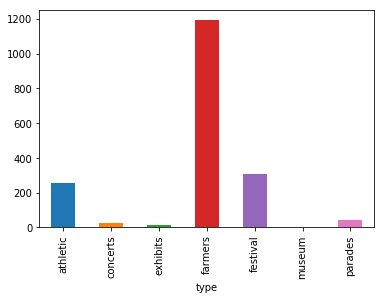

In [7]:
events_sdf.groupby("type").FID.count().plot(kind="bar");

When we examine event type by location, we notice some interesting things:
- There are a cluster of athletic events that happen around mission bay.
- Other than that, most events are evenly distributed, especially festivals and athletic events
- Though farmers markets have have the vast majority of entries in our dataset, most of these farmers markets occur in the same spot every week, so there aren’t actually many locations!

In [15]:
# Some class imbalances/location imbalances.
#
# Let's see if the event types are evenly spread across locations though.
m2 = gis.map("San Diego", zoomlevel=11)
events_sdf.spatial.plot(
    map_widget=m2,
    renderer_type='u',
    col="type"
)
m2.legend = True
m2

MapView(layout=Layout(height='400px', width='100%'), legend=True, zoom=11.0)

## 8. Analysis

This plan has changed significantly from our proposal due to a handful of reasons.  While we weren’t able to conduct the model training that our original proposal suggested, our final plan ended up being to create a pipeline that can be used to facilitate analysis if we were able to access detailed historical datasets!

Plan of action:
1. Read in and clean events data
2. Read in and clean (dissolve and clip) highways layer
3. For each event calculate/engineer features (additional X variables):
    1. Calculate the area of the baseline service area.  This is how far away you can be while still being able to arrive at the event in 5 or less minutes.  The baseline service area is a typical service area, conditional on date, day, and time.  This is handled by ArcGIS by passing in a service area date 28 years in the future, but with the same date and time as the event—exact calendar date-day combinations repeat every 28 years.
    2. For the baseline area, geoenrich the number of automobiles owned in the area.
    3. Calculate the Attendee-Vehicle ratio, which is the number of expected attendees over the number of automobiles owned in the area.
    4. Calculate the distance between the event and the nearest highway.
4. For each event calculate studied variable (y variable):
    1. Calculate the area of the historical, 'impacted' service area.  This is the same drive-to service area as before, but the date passed in is the datetime of the event.  We designed our function to call the correct code, however it will return baselines if the datetime is outside of 12 hours in the past!
    2. Calculate the proportion change from baseline area to impacted area.  This is our y variable.
5. Build a model; pass in X features (total attendance, event type, event time, service area size, number of vehicles, A-V ratio, and distance to highway) and predict the y variable (proportion change in service area).  We don’t have access to any true y variables, but this step is as simple as instantiating a sklearn model, creating a train-test split, and calling `.fit(X, y)`!
6. Sit back and use the pipeline to run analysis on the impact of events on traffic.


## Running on a single event first

### Calculating service area

In [16]:
service_area_url = gis.properties.helperServices.serviceArea.url
sa_layer = network.ServiceAreaLayer(service_area_url, gis=gis)
travel_modes = sa_layer.retrieve_travel_modes()
car_mode = [t for t in travel_modes['supportedTravelModes'] if t['name'] == 'Driving Time'][0]

sref_3857 = {'latestWkid': 3857, 'wkid': 102100}

In [17]:
time = datetime(2000, 1, 1, 11).timestamp() * 1000

# Event location
event1 = events_sdf.loc[0]
loc1 = str(event1['longitude']) + ', ' + str(event1['latitude'])

# Compute the service area

# sa_4326 = sa_layer.solve_service_area(facilities=event1, default_breaks=[5], travel_mode=car_mode,
#                                       travel_direction='esriNATravelDirectionFromFacility',
#                                       time_of_day=time, time_of_day_is_utc=False,
#                                       out_sr={'latestWkid': 4326, 'wkid': 4326})
    
sa_3857 = sa_layer.solve_service_area(facilities=loc1, default_breaks=[5], travel_mode=car_mode,
                                      travel_direction='esriNATravelDirectionToFacility',
                                      time_of_day=time, time_of_day_is_utc=False,
                                      out_sr=sref_3857)

# Calculating service area Area
service_area_area = sa_3857['saPolygons']['features'][0]['attributes']['Shape_Area']
service_area_area

7564669.136686617

In [18]:
# Plotting Service Area
service_area = arcgis.geometry.Geometry(sa_3857['saPolygons']['features'][0]['geometry'], spatialReference=sref_3857)
map1 = gis.map("San Diego", zoomlevel=10)
map1.draw(service_area)
map1

MapView(layout=Layout(height='400px', width='100%'), zoom=10.0)

### Enriching with number of automobiles owned in service area

In [19]:
# Figuring out the number of vehicles in this area
# Number of 1 vehicle owned: 'MP01002h_B'
# Number of 2 vehicles owned: 'MP01003h_B'
# Number of 3 or more vehicles owned: 'MP01004h_B'
# Source: http://doc.arcgis.com/en/esri-demographics/data/data-browser.htm
vehicles = enrich(study_areas=[service_area], data_collections=['AutomobilesAutomotiveProducts']) 

# Total number of vehicles in the service area
num_vehicles = (vehicles.MP01002h_B + 2*vehicles.MP01003h_B + 3*vehicles.MP01004h_B)[0]
num_vehicles

12905

### Calculating distance to nearest highway

In [22]:
# NOTE: The dissolve_boundaries and extract_data was performed on the following layer
#       inside of the Map Viewer on ArcGIS Online.  As such, there is no code, but here
#       are the steps we took:
# 1. Load California State Highways.
#
# 2. Make sure the highways are dissolved.  This layer already is, but layers that we
#    used previously were not.
#    Under the Analysis tab, run Dissolve Boundaries with default settings.
#
# 3. Load in the dissolved layer.
#
# 4. Under the Analysis tab, run Extract Data with Study Area set to a drawn box with
#    proper min/max lat/long values, and check Clip Features.

# ca_highways = gis.content.get("22cd676ed1f74a7290f64dd1dc9b8363")

highways = gis.content.get("5cdc4f0e9c47499aa67be8d6e0bf6091")
highways_fl = highways.layers[0]
highways_sdf = highways_fl.query().sdf

In [23]:
# Calculating distance to nearest highway
distance_to_highway = distance(geometry1= events_sdf['SHAPE'].loc[0], 
                               geometry2=highways_sdf['SHAPE'].loc[0], 
                               spatial_ref=sref_3857, 
                               geodesic=True)['distance']

distance_to_highway

3384.51232589273

In [24]:
# Map of highways and event location
map2 = gis.map('San Diego', zoomlevel=10)
map2.add_layer(highways)
events_sdf.loc[[0]].spatial.plot(map_widget=map2)
map2

MapView(layout=Layout(height='400px', width='100%'), zoom=10.0)

In [25]:
# To sum it all up, these are the new features we generated

print('Event: %s' % events_sdf['title'].loc[0])
print('Area of the service area: %d meters-squared.' %service_area_area)
print('Number of vehicles in service area: %d.' %num_vehicles)
print('Distance to the nearest highway: %d meters.' %distance_to_highway)

Event: pacific beach tuesday farmers market
Area of the service area: 7564669 meters-squared.
Number of vehicles in service area: 12905.
Distance to the nearest highway: 3384 meters.


## Generalized

In [26]:
def calc_service_area(event, baseline=True):
    """
    Helper Function.
    
    Calculates the 5 minute service area for an event
    
    """

    date = event['date'].split('-')
    
    if baseline:
        # Predicting far into the past/future will generate a service area on typical traffic speeds.
        # Note that we want these baselines to be conditional on day and time.  We're not sure if Esri
        # takes the date into account as well as the day of week, so we can use the fact that calendars
        # will exactly repeat day-date combinations every 28 years (no matter if it's a leap year or not)
        #
        # Source:
        # https://www.answers.com/Q/How_often_in_years_do_calendars_repeat_with_the_same_day-date_combinations
        
        date[0] = str(int(date[0]) + 28)
        
    # Make sure that the time is still the same as the event!
    start_time = event['start'][:2]

    time = datetime(int(date[0]), int(date[1]), int(date[2]), int(start_time)).timestamp() * 1000
    location = str(event['longitude']) + ', ' + str(event['latitude'])
    
    service_area = sa_layer.solve_service_area(facilities=location, default_breaks=[5], travel_mode=car_mode,
                                               travel_direction='esriNATravelDirectionToFacility',
                                               time_of_day = time, time_of_day_is_utc=False,
                                               out_sr={'latestWkid': 3857, 'wkid': 102100})
    
    # This can be easily changed to work with end_time and TravelDirectionFromFacility to measure
    # traffic impact from people leaving the event!
    
    return service_area


def area_service_area(service_area):
    """
    Helper Function.
    
    Calculates the area of a service area in meters.
    
    """
    
    return service_area['saPolygons']['features'][0]['attributes']['Shape_Area']
    
    
def num_vehicles(service_area):
    """
    Helper Function.
    
    Calculates the number of vehicles in a service area
    
    """
    
    study_area = arcgis.geometry.Geometry(
        service_area['saPolygons']['features'][0]['geometry'], spatialReference=sref_3857
    )
    vehicles = enrich(study_areas=[study_area], data_collections=['AutomobilesAutomotiveProducts']) 
    num_vehicles = (vehicles.MP01002h_B + 2*vehicles.MP01003h_B + 3*vehicles.MP01004h_B)[0]
    
    return num_vehicles


def dist_to_highway(event):
    """
    Helper Function.
    
    Calculates the distance of an event to the highway.
    
    """
    
    distance_to_highway = distance(geometry1= event['SHAPE'], 
                               geometry2=highways_sdf['SHAPE'].loc[0], 
                               spatial_ref={'latestWkid': 3857, 'wkid': 102100}, 
                               geodesic=True)['distance']
    
    return distance_to_highway


def generate_features(event):
    """
    Generates the following features for a particular event:
    
    1. The area of the 5 minute service area
    2. The number of veicles in a service area
    3. The distance of the event to the nearest highway
    
    Outputs a dataframe of three columns containing these values.
    
    """

    service_area = calc_service_area(event, baseline=True)
    area = area_service_area(service_area)
    vehicles = num_vehicles(service_area)
    distance = dist_to_highway(event)
    av_ratio = event["total_atte"] / vehicles
    
    features = pd.DataFrame({'service_area':[area], 'num_vehicles':[vehicles], 'av_ratio':[av_ratio], 'dist_to_highway':[distance]})
    
    return features

In [27]:
# Testing.
#
# NOTE: It is likely that these numbers will differ slightly from the example calculated above.
#       The generalized procedure produces a baseline for the service area, which in turn affects
#       the enriched number of vehicles, whereas the example above calculates a service area for
#       a set date, day, and time that may not match the actual event.
generate_features(events_sdf.loc[0])

,service_area,num_vehicles,av_ratio,dist_to_highway
0,8.995374e+06,14633,0.058771,3384.512326


In [ ]:
# Run on all.
#
#! IMPORTANT: Please do not run this any more!  With all of these service area calculations
#  this burns through credits like a fire in a pile of flammable stuff.

run = False
if run:

    events_features = pd.DataFrame()

    for index, event in events_sdf.iterrows():

        events_features = events_features.append(generate_features(event), ignore_index=True)

        
    evsdf = events_sdf.merge(events_features, left_index=True, right_index=True)
    ev = evsdf.dropna().astype({'date':'str','start':'str','end_':'str'})
    
    # to_featurelayer fails because there are less than 1000 entries.
    # So, instead we just saved a csv.
    ev.spatial.to_featurelayer("Events Features", tags="features")
    evsdf.to_csv("events-features1.csv")

In [34]:
evsdf = pd.read_csv("events-features1.csv", index_col="Unnamed: 0")
evsdf.head(3)

,FID,SHAPE,date,end_,id,latitude,longitude,start,title,total_atte,type,service_area,num_vehicles,av_ratio,dist_to_highway
0,1,"{'x': -13042312.189404054, 'y': 3857633.435881...",2018-08-08,14:00:00,49813,32.715738,-117.161084,11:00:00,curbside bites food truck markets - downtown l...,330,farmers,4.516798e+06,15931,0.020714,684.266175
1,2,"{'x': -13042916.620843215, 'y': 3858589.669007...",2018-08-08,13:00:00,50910,32.722965,-117.166514,09:00:00,little italys wednesday farmers market,1280,farmers,3.459450e+06,9725,0.131620,191.687997
2,3,"{'x': -13052720.918015596, 'y': 3868787.072960...",2019-12-31,19:00:00,51870,32.799998,-117.254587,14:00:00,pacific beach tuesday farmers market,860,farmers,8.995374e+06,14633,0.058771,3384.512326


### A "real" example

In [35]:
dsc170 = pd.DataFrame(columns=["latitude", "longitude", "date", "start", "title", "total_atte", "type"],
                     data=[[32.877651, -117.237256, "2019-06-06", "18:30:00", "dsc 170 final presentation party", 4000, "exhibit"]]
)
dsc170_sdf = pd.DataFrame.spatial.from_xy(dsc170, "longitude", "latitude", sr=4326)
dsc170_sdf["SHAPE"] = arcgis.geometry.project([dsc170.SHAPE[0]], in_sr=4326, out_sr=3857)
dsc170_sdf.loc[0]

latitude                                                32.8777
longitude                                              -117.237
date                                                 2019-06-06
start                                                  18:30:00
title                          dsc 170 final presentation party
total_atte                                                 4000
type                                                    exhibit
SHAPE         {'x': -13050791.639920656, 'y': 3879075.417441...
Name: 0, dtype: object

In [36]:
generate_features(dsc170_sdf.loc[0])

,service_area,num_vehicles,av_ratio,dist_to_highway
0,1.713553e+07,15473,0.258515,788.020208


In [37]:
X = (
    pd.concat([dsc170_sdf, generate_features(dsc170_sdf.loc[0])], axis=1)
    [["total_atte", "type", "service_area", "num_vehicles", "av_ratio", "dist_to_highway"]]
)
X

,total_atte,type,service_area,num_vehicles,av_ratio,dist_to_highway
0,4000,exhibit,1.713553e+07,15473,0.258515,788.020208


In [38]:
y = (15_000_000 - X.service_area[0]) / X.service_area[0]
y

-0.12462563567923099

## 9. Summary & Results

Although we were unable to make real event traffic impact predictions, we were successful in creating a framework that can be used to make such predictions if historical service area data were to become available in the future. The framework is generally easy to interpret and can be modified if alternate features prove to be more effective. Gathering more data for this framework is also relatively easy as event location, attendance, type, and time is readily accessible online.

```
X = generate_features([events])

impacted_areas = area_service_area([
    calc_service_area([events], baseline=False)
])
y = (impacted_areas - X.service_areas) / X.service_areas

model.fit(X, y)
```

We have had the opportunity to research and work on a topic that has very rarely been explored. This framework can be used to guide future work and help different parties assess the impact of events on nearby traffic conditions.


## 10. Discussion

1.

The literature we found didn’t provide much of an opportunity to validate their work!  Instead, we ended up referencing some of the sources in order to better inform our decisions for the features that we ended up engineering.  One of the sources claims some statistics pertaining to MLB events and the consequential increases in typical miles driven to get to the event.  Perhaps with our framework in place, this could be an easy claim to examine.

2.

The features that we choose have a profound effect on the output and usefulness of our model/analysis.  Although we took plenty of time researching which features seemed most likely to have a measurable effect on traffic conditions, it is important to note that needing to rely on features potentially prevents future analysis from uncovering what is truly going on behind the scenes.

On one hand, the use of engineered features allows models to have high accuracy on small amounts of data, and allows human domain experts to interpret and explain the importance of each feature, which can then directly be transitioned into actions—how do we change the values of those features?  We can just move the event to a different time, or add some more highway infrastructure, etc.  
On the other hand, our original plan would have relied on a large amount of data, and allowed a model many iterations to uncover interrelations that may be yet unhypothesized!  For this plan, we would have fed in a ton of street-segment traffic conditions surrounding events, as well as some event-specific information only (as opposed to geographic information), and we’d let the model develop its own hidden features.  This would have been similar to Dmitry Kudinov’s example of training a neural net on billions of 'trips' to predict service area, and then observing that the neural net learned about concepts/relations involving highways, rush hour, and other traffic-related objects and events.  It would have been an interesting application of data analytics, because we would need to then take the model’s predictions and attempt to reverse engineer the relations created in the black box!

Additionally, we chose to calculate 5 minute driving-time service areas, which could have just as easily been another number.  This was arbitrary, and we’re honestly not sure what kind of effects it would have on future analysis—perhaps it depends on how large the events are, since a very large event could cause traffic jams many miles away from the actual location!


## 11. Conclusion & Future Work

We were not quite able to completely answer our initial research question. As has already been mentioned, we were unable to gain access to historical traffic data and could therefore not calculate the traffic impact of an event. If we were to gain access to such data, we can assess the predictive power of the features we generated or explore other possible features that could help determine traffic impact. 

Despite the drawbacks, we believe that we have created something useful that can be used for future development, not just in events, but other facets of society. For example, it could be used to assess the traffic impact of newly built infrastructure in a city such as business buildings or schools. In such cases, we can treat estimated daily human traffic as attendance and the hours of work or school as times. Really any area with a known location, daily attendance, and time can be treated as an event. 

Ultimately, many small parameters/arguments can be changed in the code above in order to facilitate the study of different areas. For example: the service areas can be calculated using DirectionFromFacility instead of DirectionTo, and the datetime passed in would use the end time of the event instead of the start time. Likewise, the service area could be any distance, whether that is driving, walking, or biking. It really depends on the user and what they hope to accomplish. This is why there isn’t necessarily a specific individual that this is targeted for.
